### Parse `UR5e` in `MuJoCo`

In [4]:
import os,glfw
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco_viewer
np.set_printoptions(precision=2,suppress=True,linewidth=100)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.2]


### Parse `UR5e`

In [10]:
xml_path='../model/ur5e_menagerie/scene.xml'
# xml_path='../model/ur5e/ur5.xml'
full_xml_path = os.path.abspath(os.path.join(os.getcwd(),xml_path))
model = mujoco.MjModel.from_xml_path(full_xml_path)
data = mujoco.MjData(model)
mujoco.mj_resetData(model, data) # reset
print ("[UR5e] parsed.")

[UR5e] parsed.


### Get some useful information

In [11]:
n_joint         = model.njnt     # number of joints
joint_names     = [mujoco.mj_id2name(model,mujoco.mjtJoint.mjJNT_HINGE,x) for x in range(n_joint)]
joint_types     = model.jnt_type # joint types
joint_ranges    = model.jnt_range # joint ranges
rev_joint_idxs  = np.where(joint_types==mujoco.mjtJoint.mjJNT_HINGE)[0].astype(np.int32) 
rev_joint_names = [joint_names[x] for x in rev_joint_idxs]
pri_joint_idxs  = np.where(joint_types==mujoco.mjtJoint.mjJNT_SLIDE)[0].astype(np.int32)
pri_joint_names = [joint_names[x] for x in pri_joint_idxs]
print ("n_joint:[%d]"%(n_joint))
print ("joint_names:%s"%(joint_names))
print ("joint_types:%s"%(joint_types))
print ("joint_ranges:\n%s"%(joint_ranges))
print ("rev_joint_idxs:%s"%(rev_joint_idxs))
print ("rev_joint_names:%s"%(rev_joint_names))
print ("pri_joint_idxs:%s"%(pri_joint_idxs))
print ("pri_joint_names:%s"%(pri_joint_names))

n_joint:[13]
joint_names:['shoulder_pan_joint', 'shoulder_lift_joint', 'elbow_joint', 'wrist_1_joint', 'wrist_2_joint', 'wrist_3_joint', 'ur_tcp_joint', 'gripper_finger1_joint', 'gripper_finger1_inner_knuckle_joint', 'gripper_finger1_finger_tip_joint', 'gripper_finger2_joint', 'gripper_finger2_inner_knuckle_joint', 'gripper_finger2_finger_tip_joint']
joint_types:[3 3 3 3 3 3 3 3 3 3 3 3 3]
joint_ranges:
[[-6.28  6.28]
 [-6.28  6.28]
 [-3.14  3.14]
 [-6.28  6.28]
 [-6.28  6.28]
 [-6.28  6.28]
 [-3.14  3.14]
 [-1.    0.  ]
 [-1.    0.  ]
 [-1.    1.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [-1.    1.  ]]
rev_joint_idxs:[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
rev_joint_names:['shoulder_pan_joint', 'shoulder_lift_joint', 'elbow_joint', 'wrist_1_joint', 'wrist_2_joint', 'wrist_3_joint', 'ur_tcp_joint', 'gripper_finger1_joint', 'gripper_finger1_inner_knuckle_joint', 'gripper_finger1_finger_tip_joint', 'gripper_finger2_joint', 'gripper_finger2_inner_knuckle_joint', 'gripper_finger2_finger_tip_joint

### Simulate

In [12]:
# Viewer
viewer = mujoco_viewer.MujocoViewer(model,data,mode='window',
    title='UR5e in MuJoCo',width=1200,height=800,hide_menus=True)
viewer.cam.azimuth   = 80
viewer.cam.distance  = 6.0
viewer.cam.elevation = -30
viewer.cam.lookat = np.array([0,0,1.2])
# simulate and render
mujoco.mj_resetData(model, data)
mujoco.mj_forward(model, data)
for _ in range(10000):
    if viewer.is_alive:
        mujoco.mj_step(model,data,nstep=5)
        # mujoco.mj_forward(model,data)
        viewer.render()
    else:
        break
# close
viewer.close()

Pressed ESC
Quitting.


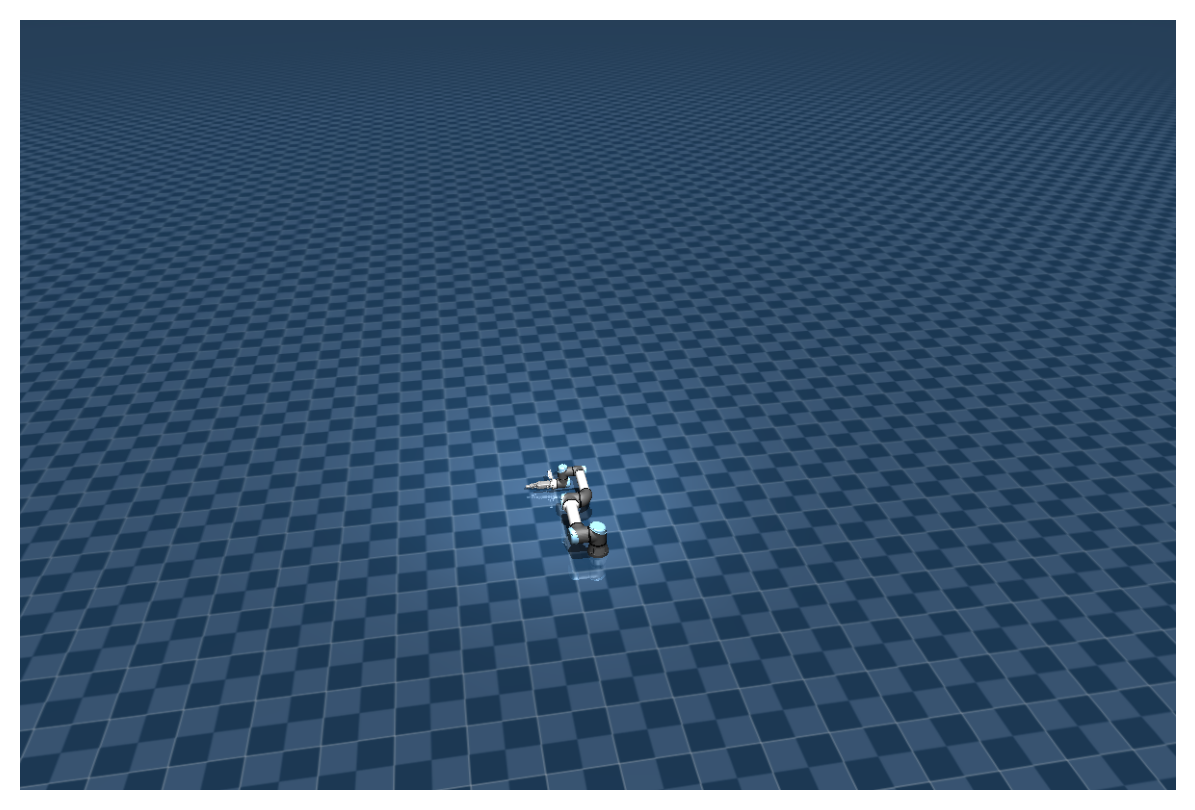

In [13]:
viewer = mujoco_viewer.MujocoViewer(model,data,mode='offscreen',
    title='UR5e in MuJoCo',width=1200,height=800,hide_menus=True)
viewer.cam.azimuth   = 80
viewer.cam.distance  = 6.0
viewer.cam.elevation = -30
viewer.cam.lookat = np.array([0,0,1.2])
img = viewer.read_pixels()
plt.figure(figsize=(8,5)); plt.imshow(img); plt.axis('off'); plt.show()
viewer.close()